In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.stats import pearsonr
from numpy.linalg import inv

In [2]:
data = pd.read_csv('50_Startups_1.csv')
#data.fillna(data.mean(), inplace = True)

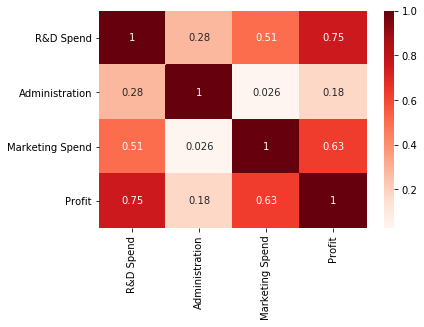

In [3]:
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [3]:

#data.fillna(data.mean(), inplace = True)

numeric_features = data.select_dtypes([np.number]).columns.tolist()

numeric_features.remove('Profit')

numeric_features

['R&D Spend', 'Administration', 'Marketing Spend']

In [10]:
print(data.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000         50.00000      50.000000
mean    69629.273200   113103.068200     195378.14840  112012.639200
std     47950.844033    39961.757032     129779.74018   40306.180338
min         0.000000        0.000000          0.00000   14681.400000
25%     28686.402500    99414.682500      95133.02500   90138.902500
50%     69820.065000   118608.950000     203322.23000  107978.190000
75%     99168.260000   142990.275000     298276.96750  139765.977500
max    165349.200000   182645.560000     471784.10000  192261.830000


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              46 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB
None


In [4]:
correlated_features = []


def correlation_test (numeric_features,target_variable,p):
    print("Features to use in model are:\n")
    for i in numeric_features:
        correlation,pvalue = pearsonr(data[i] , data[target_variable])
        
        Confidence_Level = ((1- pvalue)*100)
        if pvalue <= p:
            correlated_features.append(i)
            
            
            
    print(correlated_features)

In [5]:
correlation_test(numeric_features,'Profit' ,0.05)

Features to use in model are:

['R&D Spend', 'Marketing Spend']


In [6]:
mutli_collinear_features = []
non_multi_collinear_features = []

def multi_collinearity_check(correlated_features, p):

    for i, j in zip(correlated_features[::],correlated_features[1::] + correlated_features[::1]):
        correlation,pvalue = pearsonr(data[i] , data[j])
        if pvalue <= p:
            
            print("Columns {} & {} are non multi collinear(different)".format(i,j))
            non_multi_collinear_features.append(i)
        
        else:
            print("Columns {} & {} have multi collinearity".format(i,j))
            mutli_collinear_features.append(i)
        
        


In [8]:
multi_collinearity_check(correlated_features, 0.05)

Columns R&D Spend & Marketing Spend are non multi collinear(different)
Columns Marketing Spend & R&D Spend are non multi collinear(different)


In [9]:
non_multi_collinear_features

['R&D Spend', 'Marketing Spend']